In [ ]:
# instalação das libs
!pip install cloudant
!pip install sweetviz
!pip install pycaret
!pip install tpot

In [ ]:
#importar o cloudant e o pandas
from cloudant import Cloudant #para leitura do DB criado na IBM
import pandas as pd #para manipulação de dados

In [ ]:
#username, password e account do CLOUDANT
u, p, a = "<USERNAME>", "<PASSWORD>", "<USERNAME>"
#cria o cliente com um objeto Cloudant
client = Cloudant(cloudant_user=u,auth_token=p, account=a, connect=True, auto_renew=True)

In [ ]:
#conexão com o banco de dados
db = client['<NOMEDOBANCO-IBM>']
response = db.all_docs(limit=20000, include_docs=True)
docs = [] 
for r in response['rows']: 
  docs.append(r['doc']) 
  type(docs)


In [ ]:
#criando o Dataframe
df = pd.DataFrame(data=docs) 
#alterando as colunas latitude e longitude para float
df['LAT'] = df['LAT'].astype(float) 
df['LONG']= df['LONG'].astype(float) 


In [ ]:
#criando uma lista com as features que eu quero transformar para int64
colunas_int = ['Movimentação','Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina','Citrus', 'Açaí-Guaraná', 'Pêssego', 'row']

In [ ]:
#convertendo as colunas para int
df[colunas_int] = df[colunas_int].astype(int)

In [ ]:
#capturando informações do DB
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542 entries, 0 to 4541
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           4542 non-null   object 
 1   _rev          4542 non-null   object 
 2   Tempo         4542 non-null   object 
 3   Estação       4542 non-null   object 
 4   LAT           4542 non-null   float64
 5   LONG          4542 non-null   float64
 6   Movimentação  4542 non-null   int64  
 7   Original_473  4542 non-null   int64  
 8   Original_269  4542 non-null   int64  
 9   Zero          4542 non-null   int64  
 10  Maçã-Verde    4542 non-null   int64  
 11  Tangerina     4542 non-null   int64  
 12  Citrus        4542 non-null   int64  
 13  Açaí-Guaraná  4542 non-null   int64  
 14  Pêssego       4542 non-null   int64  
 15  TARGET        4542 non-null   object 
 16  row           4542 non-null   int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 603.4+ KB


In [ ]:
#visualizando as primeiras cinco observações do dataset
df.head()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
0,01ad2da675f70d124acfe65acd4b3df8,1-52e52f75f247490db40b85143f2c5064,2018-9-25,Brooklin,-23.6263,-46.6878,26322,45,58,16,38,35,37,3,24,REABASTECER,14665
1,01ad2da675f70d124acfe65acd4b5535,1-79d666608e50f723dae475bfdffa51f7,2018-9-29,Brooklin,-23.6263,-46.6878,26417,86,37,60,25,20,22,34,6,REABASTECER,14669
2,01ad2da675f70d124acfe65acd4bafda,1-128c5e33eff8d7c2de300455b8fb886b,2018-10-12,Brooklin,-23.6263,-46.6878,29141,45,18,29,23,4,18,30,43,NORMAL,14682
3,01ad2da675f70d124acfe65acd4c88c0,1-93e9602b52e8674c28261f57ea48819f,2018-12-15,Brooklin,-23.6263,-46.6878,30022,50,20,41,8,3,27,36,28,NORMAL,14745
4,01ad2da675f70d124acfe65acd4d4a62,1-6ae2f57775377fd4b60ba32447d139ca,2019-2-11,Brooklin,-23.6263,-46.6878,26113,86,23,35,43,32,9,9,18,NORMAL,14801


In [ ]:
#aqui vejo a quantidade de linhas e colunas do dataset
df.shape

(4542, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542 entries, 0 to 4541
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           4542 non-null   object 
 1   _rev          4542 non-null   object 
 2   Tempo         4542 non-null   object 
 3   Estação       4542 non-null   object 
 4   LAT           4542 non-null   float64
 5   LONG          4542 non-null   float64
 6   Movimentação  4542 non-null   int64  
 7   Original_473  4542 non-null   int64  
 8   Original_269  4542 non-null   int64  
 9   Zero          4542 non-null   int64  
 10  Maçã-Verde    4542 non-null   int64  
 11  Tangerina     4542 non-null   int64  
 12  Citrus        4542 non-null   int64  
 13  Açaí-Guaraná  4542 non-null   int64  
 14  Pêssego       4542 non-null   int64  
 15  TARGET        4542 non-null   object 
 16  row           4542 non-null   int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 603.4+ KB


In [ ]:
#confere as colunas do dataset
df.columns

Index(['_id', '_rev', 'Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação',
       'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TARGET', 'row'],
      dtype='object')

# ANALISANDO OS DADOS

In [ ]:
features = ['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação',
       'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego', 'TARGET', 'row']

In [ ]:
#criando uma cópia do dataset original 
dados = df.copy()
dados.head()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
0,01ad2da675f70d124acfe65acd4b3df8,1-52e52f75f247490db40b85143f2c5064,2018-9-25,Brooklin,-23.6263,-46.6878,26322,45,58,16,38,35,37,3,24,REABASTECER,14665
1,01ad2da675f70d124acfe65acd4b5535,1-79d666608e50f723dae475bfdffa51f7,2018-9-29,Brooklin,-23.6263,-46.6878,26417,86,37,60,25,20,22,34,6,REABASTECER,14669
2,01ad2da675f70d124acfe65acd4bafda,1-128c5e33eff8d7c2de300455b8fb886b,2018-10-12,Brooklin,-23.6263,-46.6878,29141,45,18,29,23,4,18,30,43,NORMAL,14682
3,01ad2da675f70d124acfe65acd4c88c0,1-93e9602b52e8674c28261f57ea48819f,2018-12-15,Brooklin,-23.6263,-46.6878,30022,50,20,41,8,3,27,36,28,NORMAL,14745
4,01ad2da675f70d124acfe65acd4d4a62,1-6ae2f57775377fd4b60ba32447d139ca,2019-2-11,Brooklin,-23.6263,-46.6878,26113,86,23,35,43,32,9,9,18,NORMAL,14801


In [ ]:
#convertendo as colunas de object para string
dados = dados.drop_duplicates(subset=['row']).copy()

In [ ]:
dados.shape

(4121, 17)

In [ ]:
sabores = ['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego']

In [ ]:
#incluindo uma coluna com a média de latas por máquina
dados['Media'] = dados[sabores].mean(axis=1)
#incluindo uma coluna com a mediana de latas por máquina
dados['Mediana'] = dados[sabores].median(axis=1)

In [ ]:
#conferindo quantos dados sobraram
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4121 entries, 0 to 4541
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           4121 non-null   object 
 1   _rev          4121 non-null   object 
 2   Tempo         4121 non-null   object 
 3   Estação       4121 non-null   object 
 4   LAT           4121 non-null   float64
 5   LONG          4121 non-null   float64
 6   Movimentação  4121 non-null   int64  
 7   Original_473  4121 non-null   int64  
 8   Original_269  4121 non-null   int64  
 9   Zero          4121 non-null   int64  
 10  Maçã-Verde    4121 non-null   int64  
 11  Tangerina     4121 non-null   int64  
 12  Citrus        4121 non-null   int64  
 13  Açaí-Guaraná  4121 non-null   int64  
 14  Pêssego       4121 non-null   int64  
 15  TARGET        4121 non-null   object 
 16  row           4121 non-null   int64  
 17  Media         4121 non-null   float64
 18  Mediana       4121 non-null 

In [ ]:
#promise do python - não funcionou
try:
  #converte uma coluna para tempo - útil para séries temporais
  dados['Tempo'] = pd.to_datetime(dados['Tempo'], yearfirst=True)
except:
  pass
  

In [ ]:
#importando libs de visualização
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz

In [ ]:
#comparando se tem linhas com o a informação row repetida
len(dados['row']),len(set(dados['row'])) #tamanho da série, e comparo com o tamanho do set(que remove duplicidades)

(4121, 4121)

In [ ]:
#criando dois subsets, um só com as linhas com Target Reabastecer e outro com a Normal
reabastecer = dados.loc[dados['TARGET'] == 'REABASTECER'] #método de subset .loc
normal = dados.query('TARGET == "NORMAL"') #usando uma query

In [ ]:
#comparando o balanceamento
reabastecer.shape[0], normal.shape[0] 

(1348, 2773)

In [ ]:
#função para criar gráficos
def dist(sabor):
  ax1 = sns.distplot(reabastecer[sabor])
  ax2 = sns.distplot(normal[sabor]);

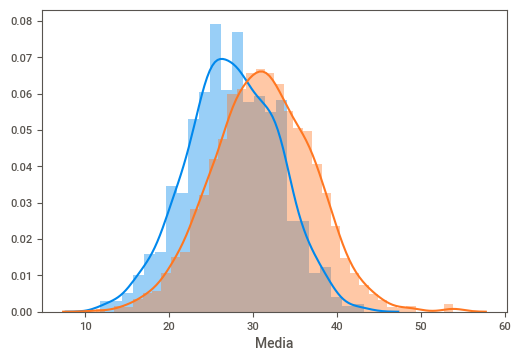

In [ ]:
dist('Media')

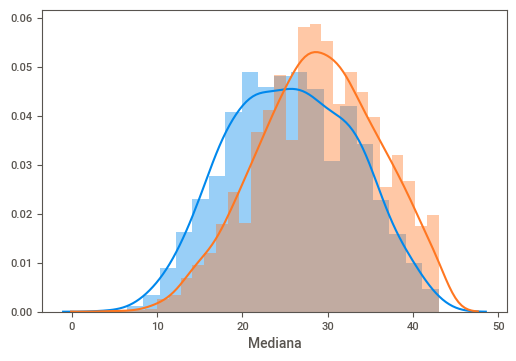

In [ ]:
dist('Mediana')

In [ ]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as sct

In [ ]:
#verificando se a média se distribui como uma normal
estatistica, p_valor = sct.shapiro(dados['Media'])
print(estatistica)
print(p_valor)

0.9982832670211792
0.00018662429647520185


In [ ]:
#testando a hipótese nula de que a distribuição é normal
significancia = 0.05
p_valor <= significancia

True

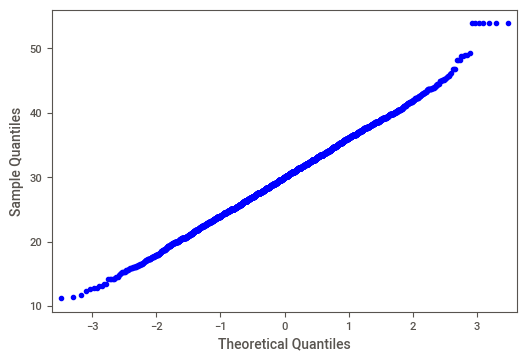

In [ ]:
qqplot(dados['Media']);

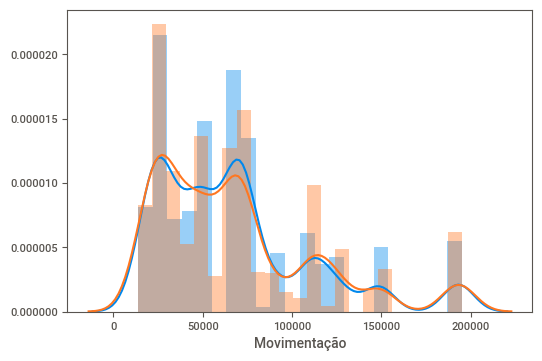

In [ ]:
#distribuição da movimentação entre máquinas por reabastecer e em status normal
dist('Movimentação')

35.76510555690366 36.0


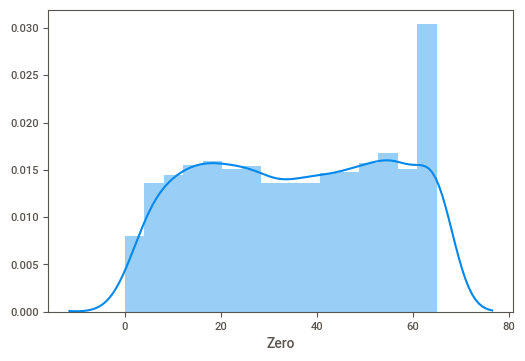

In [ ]:
print(dados['Zero'].mean(), dados['Zero'].median())
sns.distplot(dados['Zero']);

In [ ]:
sabores.append('Media')
sabores.append('Mediana')

In [ ]:
sabores

['Original_473',
 'Original_269',
 'Zero',
 'Maçã-Verde',
 'Tangerina',
 'Citrus',
 'Açaí-Guaraná',
 'Pêssego',
 'Media',
 'Mediana']

In [ ]:
#selecionando as features
features = sabores.copy()

In [ ]:
dados.head()

,_id,_rev,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row,Media,Mediana
0,01ad2da675f70d124acfe65acd4b3df8,1-52e52f75f247490db40b85143f2c5064,2018-9-25,Brooklin,-23.6263,-46.6878,26322,45,58,16,38,35,37,3,24,REABASTECER,14665,32.000,36.0
1,01ad2da675f70d124acfe65acd4b5535,1-79d666608e50f723dae475bfdffa51f7,2018-9-29,Brooklin,-23.6263,-46.6878,26417,86,37,60,25,20,22,34,6,REABASTECER,14669,36.250,29.5
2,01ad2da675f70d124acfe65acd4bafda,1-128c5e33eff8d7c2de300455b8fb886b,2018-10-12,Brooklin,-23.6263,-46.6878,29141,45,18,29,23,4,18,30,43,NORMAL,14682,26.250,26.0
3,01ad2da675f70d124acfe65acd4c88c0,1-93e9602b52e8674c28261f57ea48819f,2018-12-15,Brooklin,-23.6263,-46.6878,30022,50,20,41,8,3,27,36,28,NORMAL,14745,26.625,27.5
4,01ad2da675f70d124acfe65acd4d4a62,1-6ae2f57775377fd4b60ba32447d139ca,2019-2-11,Brooklin,-23.6263,-46.6878,26113,86,23,35,43,32,9,9,18,NORMAL,14801,31.875,27.5


In [ ]:
#criar uma análise do sweetviz
my_report = sweetviz.analyze(dados)

:FEATURES DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [ ]:
my_report.show_html('report_tnt.html')

Report report_tnt.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
#criando nosso X e Y
X = dados[features]
y = dados.TARGET

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
numericos = dados.select_dtypes(include='number')
numericos = numericos.drop(['row'], axis=1)
numericos

,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,Media,Mediana
0,-23.6263,-46.6878,26322,45,58,16,38,35,37,3,24,32.000,36.0
1,-23.6263,-46.6878,26417,86,37,60,25,20,22,34,6,36.250,29.5
2,-23.6263,-46.6878,29141,45,18,29,23,4,18,30,43,26.250,26.0
3,-23.6263,-46.6878,30022,50,20,41,8,3,27,36,28,26.625,27.5
4,-23.6263,-46.6878,26113,86,23,35,43,32,9,9,18,31.875,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537,-23.5365,-46.6332,124504,6,19,18,43,36,36,27,24,26.125,25.5
4538,-23.5365,-46.6332,126010,9,35,39,36,4,14,23,5,20.625,18.5
4539,-23.5365,-46.6332,126897,62,41,51,18,18,19,34,11,31.750,26.5
4540,-23.5813,-46.6383,67056,9,38,59,11,8,24,34,6,23.625,17.5


In [ ]:
#feature selection
selector = RFECV(estimator=RandomForestClassifier())

In [ ]:
selector.fit(numericos, y)

RFECV(cv=None,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [ ]:
selector.support_

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
colunas = pd.DataFrame({'coluna':numericos.columns,
              'bool': selector.support_})

In [ ]:
rfe_features = list(colunas.query('bool == True').coluna.values)

In [ ]:
rfe_features

['Movimentação',
 'Original_473',
 'Original_269',
 'Zero',
 'Maçã-Verde',
 'Tangerina',
 'Citrus',
 'Açaí-Guaraná',
 'Pêssego',
 'Media',
 'Mediana']

In [ ]:
X = dados[['Original_473',
 'Original_269',
 'Zero',
 'Maçã-Verde',
 'Tangerina',
 'Citrus',
 'Açaí-Guaraná',
 'Pêssego',
 'Media']]

In [ ]:
X.head()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,Media
0,45,58,16,38,35,37,3,24,32.000
1,86,37,60,25,20,22,34,6,36.250
2,45,18,29,23,4,18,30,43,26.250
3,50,20,41,8,3,27,36,28,26.625
4,86,23,35,43,32,9,9,18,31.875


In [ ]:
y

0       REABASTECER
1       REABASTECER
2            NORMAL
3            NORMAL
4            NORMAL
           ...     
4537    REABASTECER
4538         NORMAL
4539         NORMAL
4540         NORMAL
4541    REABASTECER
Name: TARGET, Length: 4121, dtype: object

In [ ]:
#!pip install pycaret

In [ ]:
#correlação
X.corr()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,Media
Original_473,1.000000,0.015768,0.050094,0.020119,0.013702,-0.004258,0.024591,0.018822,0.578888
Original_269,0.015768,1.000000,-0.025232,-0.006893,0.020253,-0.016120,0.031249,-0.018357,0.389750
Zero,0.050094,-0.025232,1.000000,0.006784,0.009762,-0.018510,0.013018,-0.012891,0.415819
Maçã-Verde,0.020119,-0.006893,0.006784,1.000000,0.029693,0.041302,0.024086,0.035718,0.295852
Tangerina,0.013702,0.020253,0.009762,0.029693,1.000000,0.018710,0.012417,0.059007,0.304939
Citrus,-0.004258,-0.016120,-0.018510,0.041302,0.018710,1.000000,-0.003190,0.047513,0.261976
Açaí-Guaraná,0.024591,0.031249,0.013018,0.024086,0.012417,-0.003190,1.000000,0.042724,0.306012
Pêssego,0.018822,-0.018357,-0.012891,0.035718,0.059007,0.047513,0.042724,1.000000,0.300055
Media,0.578888,0.389750,0.415819,0.295852,0.304939,0.261976,0.306012,0.300055,1.000000


In [ ]:
from pycaret.classification import *

In [ ]:
ml_setup = setup(data=dados, target='TARGET', train_size=0.8, session_id=1234,                
                 )

Setup Succesfully Completed!


,Description,Value
0,session_id,1234
1,Target Type,Binary
2,Label Encoded,"NORMAL: 0, REABASTECER: 1"
3,Original Data,"(4121, 19)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
compare_models(fold=5,exclude=['svm','qda','lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Decision Tree Classifier,0.7506,0.7205,0.6336,0.6156,0.6235,0.4373,0.4382,0.5407
1,Light Gradient Boosting Machine,0.7491,0.8411,0.6698,0.6053,0.6356,0.4451,0.4467,0.7186
2,CatBoost Classifier,0.7482,0.8458,0.6021,0.6179,0.6095,0.4239,0.4242,23.3962
3,Gradient Boosting Classifier,0.7330,0.8455,0.4852,0.6163,0.5428,0.3581,0.3633,21.9503
4,Extreme Gradient Boosting,0.7303,0.8456,0.4778,0.6128,0.5362,0.3504,0.3561,35.5614
5,Ada Boost Classifier,0.7184,0.8307,0.3804,0.6108,0.4685,0.2912,0.3062,9.9523
6,Random Forest Classifier,0.7051,0.7980,0.2746,0.6043,0.3770,0.2194,0.2482,0.7111
7,Logistic Regression,0.6775,0.6748,0.1921,0.5168,0.2792,0.1256,0.1509,3.5117
8,Naive Bayes,0.6763,0.6932,0.4565,0.5059,0.4793,0.2456,0.2466,0.4017
9,Extra Trees Classifier,0.6738,0.7456,0.0380,0.5387,0.0709,0.0275,0.0670,8.4841


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

# TESTANDO MODELOS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [ ]:
#balanceando os dados de treino
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_trainb, y_trainb = smote.fit_resample(X_train, y_train)

In [ ]:
#criando o modelo
knn = KNeighborsClassifier()

In [ ]:
#ajustando o modelo aos dados de teste
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#fazendo a predição dos dados de teste
y_knn = knn.predict(X_test)

In [ ]:
#importando as libs de métricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(y_test, y_knn)

0.6501416430594901

In [ ]:
#relatório de classificação - não esquecer do print mágico
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

      NORMAL       0.67      0.88      0.76       453
 REABASTECER       0.53      0.23      0.32       253

    accuracy                           0.65       706
   macro avg       0.60      0.56      0.54       706
weighted avg       0.62      0.65      0.61       706



In [ ]:
print(confusion_matrix(y_test,y_knn))

[[400  53]
 [194  59]]


In [ ]:
#usando o Linear SVC
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced', random_state=42)

In [ ]:
lsvc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [ ]:
y_svc = lsvc.predict(X_test)

In [ ]:
#medindo a acurácia
accuracy_score(y_test, y_svc)

0.6430594900849859

In [ ]:
#classification report
print(classification_report(y_test, y_svc))
print(confusion_matrix(y_test, y_svc))

              precision    recall  f1-score   support

      NORMAL       0.64      1.00      0.78       453
 REABASTECER       0.60      0.01      0.02       253

    accuracy                           0.64       706
   macro avg       0.62      0.50      0.40       706
weighted avg       0.63      0.64      0.51       706

[[451   2]
 [250   3]]


In [ ]:
#usando o RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.5, 
                            min_samples_leaf=19, min_samples_split=6, n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=19, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_rf = rf.predict(X_test)

In [ ]:
 def avalia(y_test, y_pred): 
  print(accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

In [ ]:
avalia(y_test,y_rf)

0.7436260623229461
              precision    recall  f1-score   support

      NORMAL       0.84      0.74      0.79       453
 REABASTECER       0.62      0.75      0.68       253

    accuracy                           0.74       706
   macro avg       0.73      0.75      0.73       706
weighted avg       0.76      0.74      0.75       706

[[335 118]
 [ 63 190]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [ ]:
y_dtc = dtc.predict(X_test)

In [ ]:
avalia(y_test,y_dtc)

0.7521246458923513
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       472
           1       0.63      0.60      0.62       234

    accuracy                           0.75       706
   macro avg       0.72      0.71      0.72       706
weighted avg       0.75      0.75      0.75       706

[[390  82]
 [ 93 141]]


In [ ]:
#matriz de confusão
import numpy as np
import itertools

#criando uma função para plotar
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

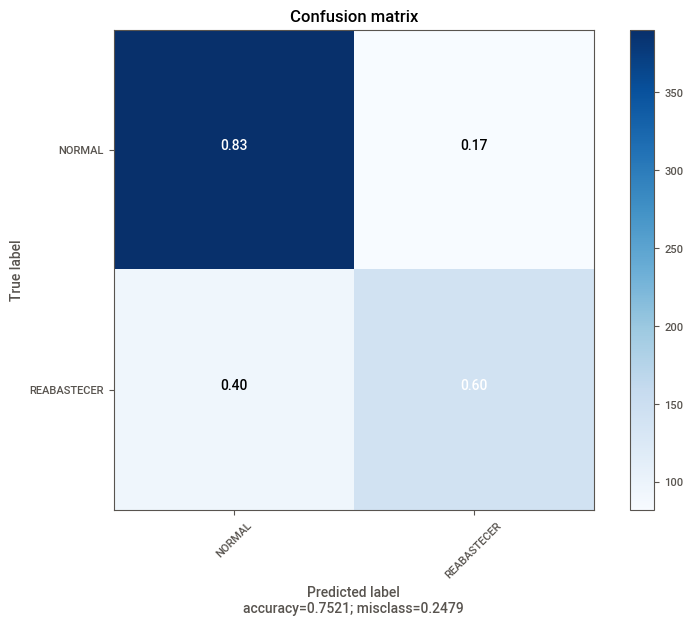

In [ ]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, y_dtc), ['NORMAL', 'REABASTECER'])